# Communicate a data set

**project for Udacity Nanodegree by Léon de Jong**

Investigating the Prosper Load dataset.

In [1]:
#import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline
%config Completer.use_jedi = False
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_loan = pd.read_csv('prosperLoanData.csv')

## Inital investigation of Dataset

In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
print(df_loan.shape)
print(df_loan.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


Initialy there are 113937 rows, which each row representing a listing on the prosper website for a loan. Each listing has a maximum of 81 variables attached. Not all variables are available, as some are associated with previous loans or other information that might not be available. As 81 variables are to much for intial analysis, a series of variables are selected from the variable definition list. 

In [5]:
voi = ['ListingKey','ListingCreationDate','Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','CurrentlyInGroup','GroupKey','CreditScoreRangeLower','CreditScoreRangeUpper','AmountDelinquent','DebtToIncomeRatio','IncomeVerifiable','StatedMonthlyIncome','LoanKey','TotalProsperLoans','MonthlyLoanPayment']

In [6]:
df_loan_filtered = df_loan[voi]
df_loan_filtered.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,GroupKey,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,MonthlyLoanPayment
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,NaN,640.0,659.0,472.0,0.17,True,3083.333333,E33A3400205839220442E84,NaN,330.43
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,NaN,680.0,699.0,0.0,0.18,True,6125.000000,9E3B37071505919926B1D82,NaN,318.93
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,783C3371218786870A73D20,480.0,499.0,NaN,0.06,True,2083.333333,6954337960046817851BCB2,NaN,123.32
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,NaN,800.0,819.0,10056.0,0.15,True,2875.000000,A0393664465886295619C51,NaN,321.45
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,NaN,680.0,699.0,0.0,0.26,True,9583.333333,A180369302188889200689E,1.0,563.97


Many interesting variables are only applicable for loans originating after 2009, let's filter these out

In [7]:
df_loan_filtered['ListingCreationDate'] = df_loan_filtered['ListingCreationDate'].astype('datetime64')

In [8]:
# select loans from after July 2009
df_loan_filtered = df_loan_filtered[df_loan_filtered['ListingCreationDate']>'2009-08-01']

In [9]:
df_loan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84672 entries, 1 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingKey                 84672 non-null  object        
 1   ListingCreationDate        84672 non-null  datetime64[ns]
 2   Term                       84672 non-null  int64         
 3   LoanStatus                 84672 non-null  object        
 4   BorrowerAPR                84672 non-null  float64       
 5   BorrowerRate               84672 non-null  float64       
 6   LenderYield                84672 non-null  float64       
 7   EstimatedEffectiveYield    84672 non-null  float64       
 8   EstimatedLoss              84672 non-null  float64       
 9   EstimatedReturn            84672 non-null  float64       
 10  ProsperRating (numeric)    84672 non-null  float64       
 11  ProsperRating (Alpha)      84672 non-null  object        
 12  Pro

Let's first look at the different scores that are available and their effect on on the LenderYield and BorowerRate

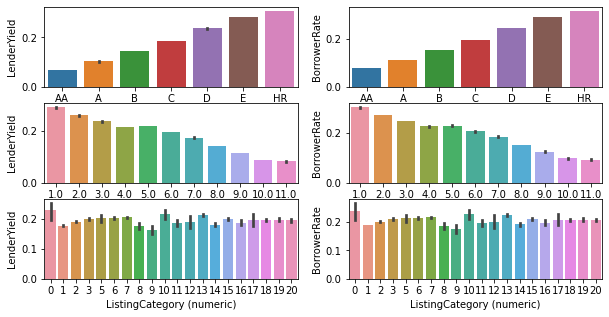

In [28]:
fig, axs = plt.subplots(3,2, figsize = (10,5))
sb.barplot(ax = axs[0,0],data = df_loan_filtered, x = 'ProsperRating (Alpha)', y = 'LenderYield');
sb.barplot(ax = axs[0,1],data = df_loan_filtered, x = 'ProsperRating (Alpha)', y = 'BorrowerRate');
sb.barplot(ax = axs[1,0],data = df_loan_filtered, x = 'ProsperScore', y = 'LenderYield');
sb.barplot(ax = axs[1,1],data = df_loan_filtered, x = 'ProsperScore', y = 'BorrowerRate');
sb.barplot(ax = axs[2,0],data = df_loan_filtered, x = 'ListingCategory (numeric)', y = 'LenderYield');
sb.barplot(ax = axs[2,1],data = df_loan_filtered, x = 'ListingCategory (numeric)', y = 'BorrowerRate');

#try this in a stacked bar chart

In [27]:
# convert ProsperRating into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loan_filtered[var] = df_loan_filtered[var].astype(ordered_var)

to do:
Prosper Rating: rated categories

** difference between lender Yield and Borrower Rate?**
** Prospor Score predictor for  **
** amount delinquent per prosper score** --> doesn't seem to be correlated
** seems to be a difference in slope of correlation between estimated loss and prosper rating between members of groups and non members**
** percentage of loan status per rating ** 
** estimated loss needs to be entered**  DONE
** descriptive statistics per score predictors
Group key is irrelevant as no more information is available, Currently in Group is relevant. Groups are groups of Prosper members around an affiliation or interest. They can recieve better ratings or no.

possible....interest per rating and group member...there are 217 groups, and no more information about each group...so can be deleted

In [50]:
df_loan_filtered.GroupKey.nunique()

217

<AxesSubplot:xlabel='CurrentlyInGroup', ylabel='LenderYield'>

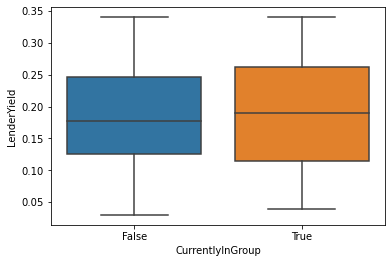

In [55]:
sb.boxplot(data = df_loan_filtered, x = 'CurrentlyInGroup', y='LenderYield')

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='AmountDelinquent'>

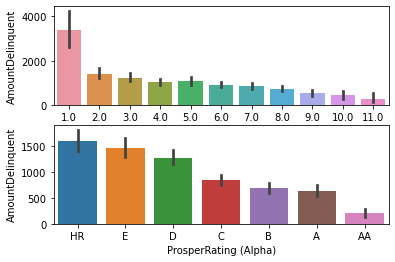

In [84]:
Rating_list = ['AA','A','B','C','D','E','HR']
order = reversed(Rating_list)
fig, axs = plt.subplots(2)
sb.barplot(ax = axs[0], x = df_loan_filtered['ProsperScore'],y = df_loan_filtered['AmountDelinquent'])
sb.barplot(ax = axs[1], x = df_loan_filtered['ProsperRating (Alpha)'], y = df_loan_filtered['AmountDelinquent'], order = order)

<AxesSubplot:xlabel='ProsperScore', ylabel='AmountDelinquent'>

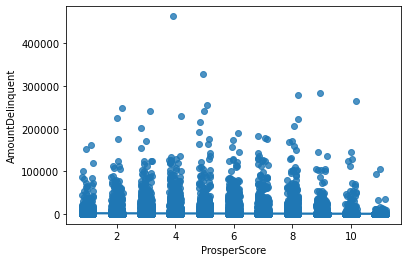

In [46]:
sb.regplot(y = df_loan_filtered['AmountDelinquent'], x = df_loan_filtered['ProsperScore'], x_jitter=0.2, fit_reg=True,)

<AxesSubplot:xlabel='ProsperRating (numeric)', ylabel='EstimatedLoss'>

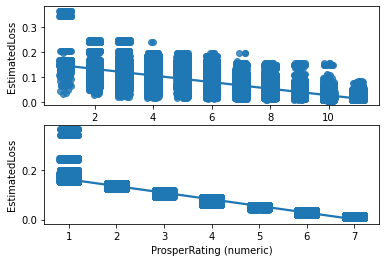

In [86]:
fig, axs= plt.subplots(2)
sb.regplot(ax=axs[0],y = df_loan_filtered['EstimatedLoss'], x = df_loan_filtered['ProsperScore'], x_jitter=0.2, fit_reg=True)
sb.regplot(ax=axs[1],y = df_loan_filtered['EstimatedLoss'], x = df_loan_filtered['ProsperRating (numeric)'], x_jitter=0.2, fit_reg=True)

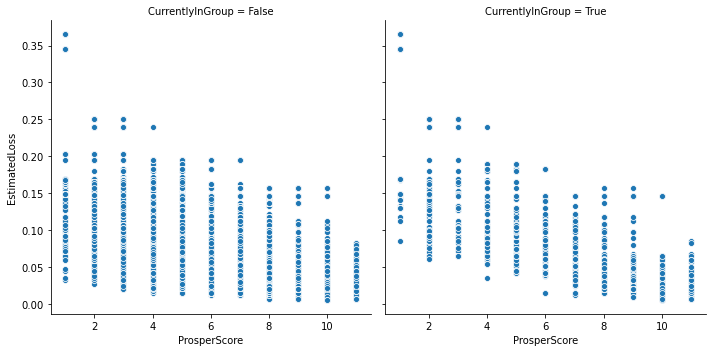

In [63]:
sb.relplot(data = df_loan_filtered, y = 'EstimatedLoss', x = 'ProsperScore', col= 'CurrentlyInGroup')

In [64]:
import statsmodels.api as sm
mod = sm.OLS(df_loan_filtered['AmountDelinquent'],df_loan_filtered['ProsperScore'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:       AmountDelinquent   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              906.1
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                   5.28e-198
Time:                        11:59:13   Log-Likelihood:                     -8.7506e+05
No. Observations:               84672   AIC:                                  1.750e+06
Df Residuals:                   84671   BIC:                                  1.750e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

There is a correlation between ProsperSCore and amount delinquent. But is is not a linear regression

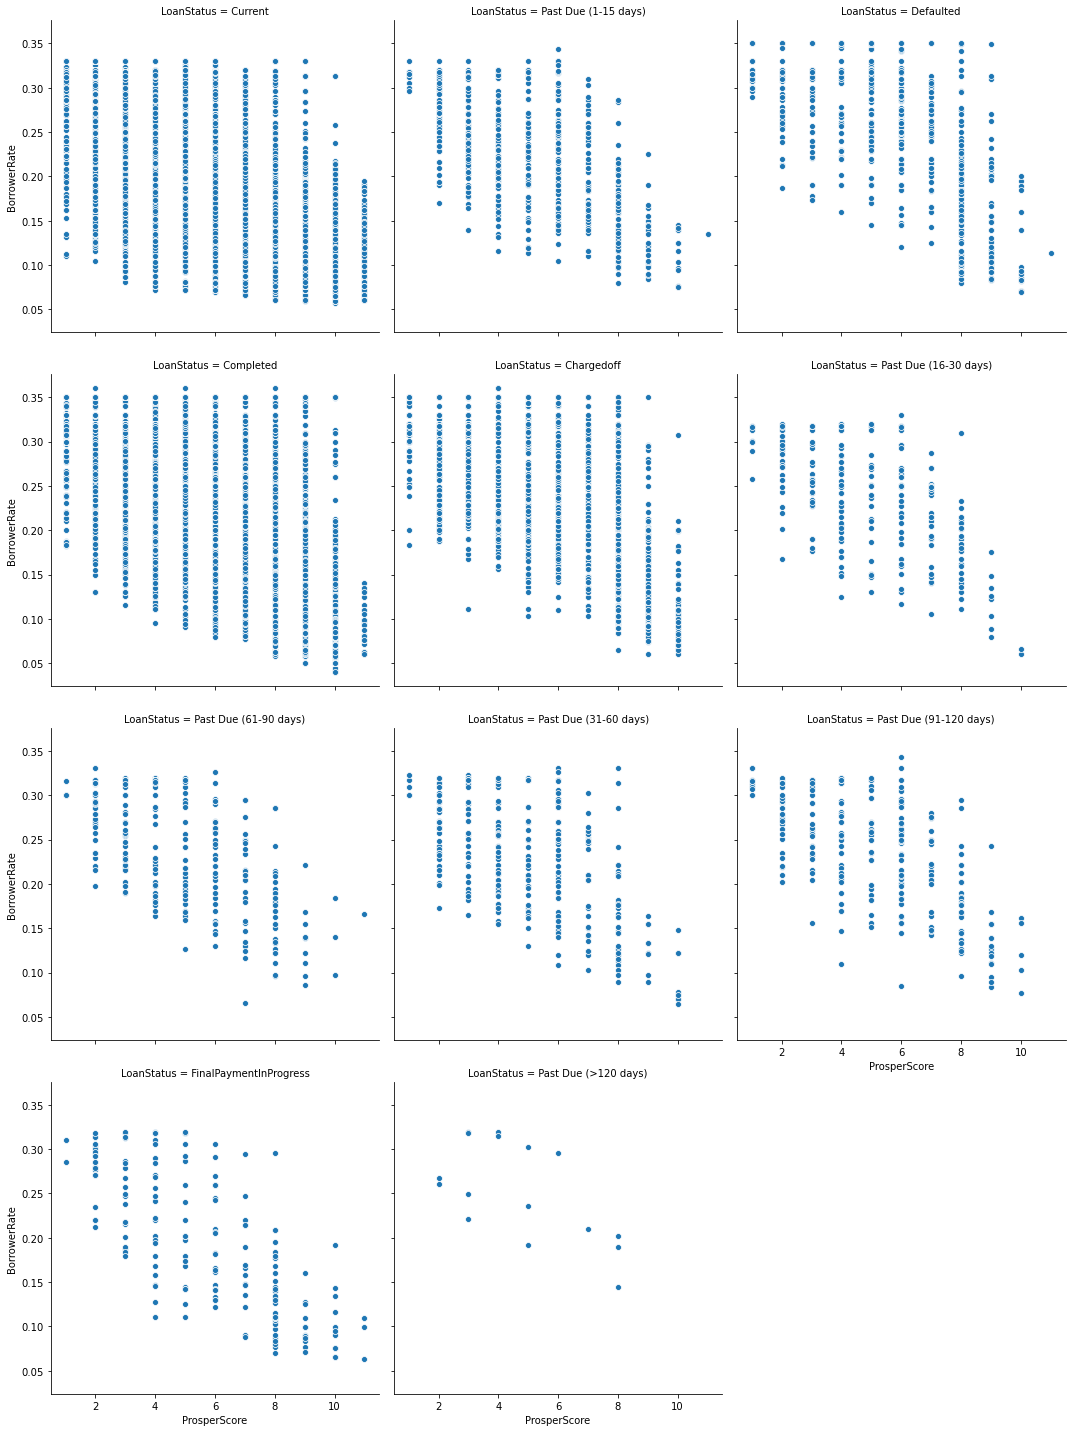

In [66]:
# Loan status vs Prosper Rating
sb.relplot(data= df_loan_filtered, x = 'ProsperScore', y = 'BorrowerRate', col='LoanStatus', col_wrap=3)

## Development of Analysis
The initial viewing of the data has given some interesting insights. There are several rating systems to determine the risk involved with a listing
1. ProsperRating
2. ProsperScore
One obvious question to ask is, is there a difference between the two in terms of categorising risk. Initial plots show differences in slope of correlation with Estimated loss, and Lender Yield. Also differences in grouping upon estimated loss

secondly there when looking at possible indicators of succes for the listing, the Loan status and Estimated Loss are two that require scrutiny. Are the rating systems correlated with these two indicators, and are there other factors involved? 

Lastly, Test several combinations of indicators, with the succes factors above. 
listing category
group membership
rating / score

